In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
import math
import scipy.integrate
import os
import pandas as pd
import seaborn as sb
import sys
sys.path.insert(0, '..')
import cylinder.surfaces_and_fields.system_cylinder as cylinder

firsttime=False

plt.rcParams["figure.figsize"]=10,10
plt.rcParams['font.size'] = '18'

# Linear Field Effect

With added field 

In [4]:
def kcrit(g,h, alpha=-1, c=1, n=6, u=1):
    g+=1/2*h**2
    if alpha<0:
        chi = - alpha* c*n*n/(2*u)
    else:
        chi=0
    discriminant1 =8*(2*g-3)+(-1+4*h+2*g + 8*chi)**2
    if discriminant1<0:
        return np.nan
    else:
        discriminant2 = 1-2*g-4*h -8*chi + math.sqrt(discriminant1)
        #print(discriminant2, math.sqrt(discriminant1), 1-8*h + math.sqrt(discriminant1), 2*g)
        if discriminant2 <0:
            return np.nan
        else:
            return .5*math.sqrt(discriminant2)

In [5]:
def kcrit_secondsolution(g,h, alpha=-1, c=1, n=6, u=1):
    g+=1/2*h**2
    if alpha<0:
        chi = - alpha* c*n*n/(2*u)
    else:
        chi=0
    discriminant1 =8*(2*g-3)+(-1+4*h+2*g + 8*chi)**2
    if discriminant1<0:
        return np.nan
    else:
        discriminant2 = 1-2*g-4*h -8*chi -math.sqrt(discriminant1)
        if discriminant2 <0:
            return np.nan
        else:
            return .5*math.sqrt(discriminant2)

Text(0.5, 0, '$H_0$')

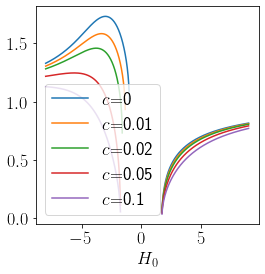

In [6]:
fine_hs = np.arange(-8, 9, .01)
g_ratio=0
plt.figure(figsize=(4,4)) 
kcrits_rangehs={}
for c in [0, 1/100,1/50, 1/20, 1/10]:
    kcrits_rangehs[c] = [kcrit(g_ratio,h, alpha=-1, c=c) for h in fine_hs] 
    plt.plot(fine_hs, [kc for kc in kcrits_rangehs[c]], label = r'$c$=' + str(c))
plt.legend()
plt.xlabel(r"$H_0$")

Text(0.5, 0, '$H_0$')

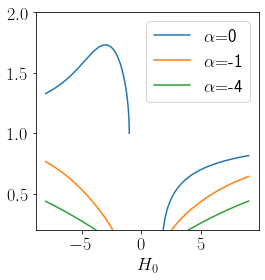

In [12]:
plt.figure(figsize=(4,4)) 
kcrits_rangehs={}
for alpha in [0, -1, -4]:
    kcrits_rangehs[alpha] = [kcrit(g_ratio,h, alpha=alpha, c=0.5) for h in fine_hs] 
    plt.plot(fine_hs, [kc for kc in kcrits_rangehs[alpha]], label = r'$\alpha$=' + str(alpha))
plt.legend()
plt.ylim((.2, 2))
plt.xlabel(r"$H_0$")

Text(0.5, 0, '$H_0$')

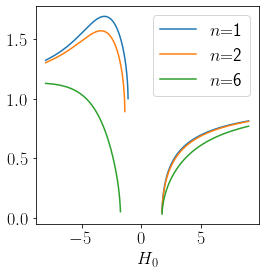

In [8]:
plt.figure(figsize=(4,4)) 
kcrits_rangehs={}
for n in [1,2,6]:
    kcrits_rangehs[alpha] = [kcrit(g_ratio,h, alpha=-1, c=.1,n=n) for h in fine_hs] 
    plt.plot(fine_hs, [kc for kc in kcrits_rangehs[alpha]], label = r'$n$=' + str(n))
plt.legend()
plt.xlabel(r"$H_0$")

Text(0.5, 0, '$H_0$')

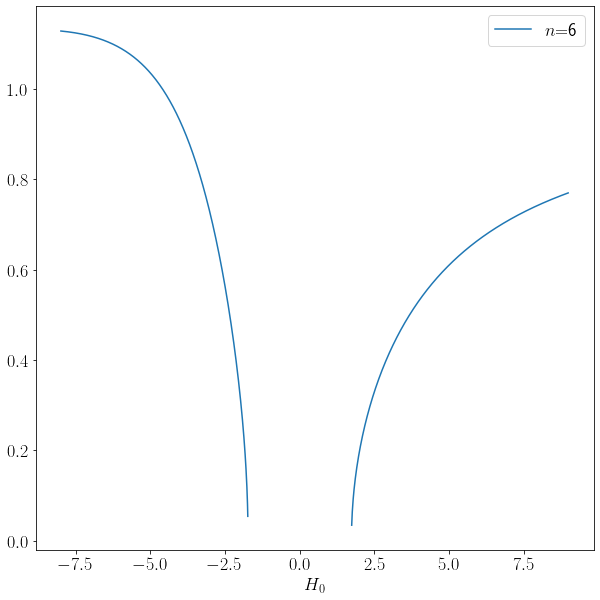

In [9]:
gratio=0
kcrits_rangehs={}
kcrits_rangehs[gratio] = [kcrit(g_ratio,h, alpha=-1, c=.1,n=6) for h in fine_hs] 
plt.plot(fine_hs, [kc for kc in kcrits_rangehs[gratio]], label = r'$n$=' + str(n))
plt.legend()
plt.xlabel(r"$H_0$")

In [10]:
H0_s=np.arange(-8,8.0001,.05)
ks = np.arange(0.1, 2.3, .1) #have to go higher in k here
kappa=1
gammas=[0, 1.5, 10] #zero, critical, and a high surface tension
df_minima_total_as={} #dict of dataframes by gamma
df_minima_total_Es={}
names= {0:'0', 1.5: '1p5', 10: '10'} #for filenames

In [11]:
for gamma in [0]:
    if firsttime:
        # generate grids of energy minimizing value a and the minimum energy in
        # H0 x k.  This can take a long time with above fine grid spacing.
        minima_total_as={}
        minima_total_Es={}
        for H0 in H0_s:
            #print(H0)
            minima_total_as_H0={}
            minima_total_Es_H0={}
            for k in ks:
                #there should be a better way than setting up a new object, with attached
                # MetropolisEngine,  each time
                # ... like resetting its values
                cy=cylinder.Cylinder(wavenumber=k, radius=1, kappa=kappa, gamma=gamma, intrinsic_curvature=H0)
                curvenergya={}
                for a in a_s:
                    energy=cy.calc_surface_energy(amplitude=a) #this is (g*Area + kappa/2 Bending) already
                    curvenergya[round(a,2)]=energy*k
                total_energy_vs_a = pd.Series(curvenergya)#turn dict to series
                min_a = total_energy_vs_a.idxmin()
                min_energy = total_energy_vs_a[min_a]
                minima_total_as_H0[round(k,5)]=abs(min_a)
                minima_total_Es_H0[round(k,5)]= min_energy
            minima_total_as[round(H0,3)]=minima_total_as_H0
            minima_total_Es[round(H0,3)]=minima_total_Es_H0
        df_minima_total_as[gamma]=pd.DataFrame(minima_total_as)
        df_minima_total_Es[gamma]=pd.DataFrame(minima_total_Es)
        df_minima_total_as[gamma].to_csv("chapter2data/minimizing_a_H0_gamma"+names[gamma]+"_tmp.csv")
        df_minima_total_Es[gamma].to_csv("chapter2data/minimizing_E_H0_gamma"+names[gamma]+"_tmp.csv")
    else:
        df_minima_total_as[gamma]=pd.read_csv("chapter2data/minimizing_a_H0_gamma"+names[gamma]+".csv", index_col=0, dtype=float)
        df_minima_total_Es[gamma]=pd.read_csv("chapter2data/minimizing_E_H0_gamma"+names[gamma]+".csv", index_col=0, dtype=float)

(161, 22)


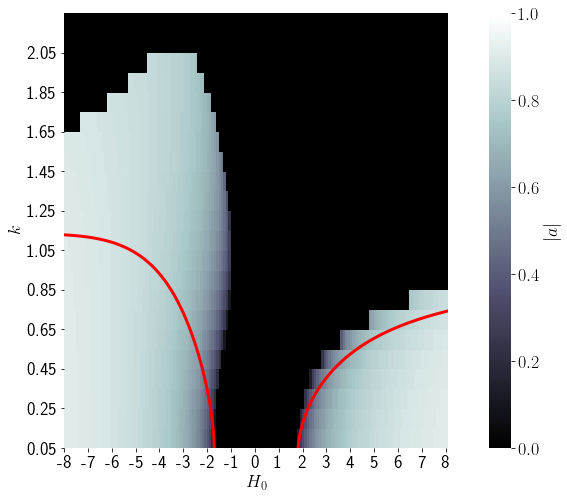

In [12]:
xfactor, yfactor = df_minima_total_as[0].transpose().shape
print((xfactor, yfactor))
xfactor/=16.0
yfactor/=2.2
offsetx=-8
offsety=.05
fine_hs_scaled = [(h-offsetx)*xfactor for h in fine_hs]
kcrits_rangehs_scaled={}
kcrits_rangehs_second_scaled={}
for g in [0]:
    kcrits_rangehs_scaled[g] = [(kc-offsety)*yfactor for kc in kcrits_rangehs[g]]


f,(ax1,axcb) = plt.subplots(1,2, 
            gridspec_kw={'width_ratios':[1.4, 0.08]}, figsize=(8,8)) #the last axis is for colorbar
#ax1.get_shared_y_axes().join(ax1,ax2)
ax1.plot(fine_hs_scaled, kcrits_rangehs_scaled[0], color='red',linewidth=3)
g1 = sb.heatmap(df_minima_total_as[0],cmap='bone', cbar=True,ax=ax1, vmax=1, vmin=0,cbar_kws={'label':r'$|a|$'},
                cbar_ax=axcb,)
g1.set_ylabel(r'$k$')
g1.set_xlabel(r'$H_0$')
g1.set_xticks([n for n in range(0,161,10)])
g1.set_xticklabels([round(n/10-8) for n in range(0,161,10)], rotation = 0)
g1.set_yticks([n for n in range(0,22,2)])
g1.set_yticklabels([round(n/10+.05,5) for n in range(0,22,2)])
ax1.invert_yaxis()


plt.savefig("chapter2data/numerical_H0_g0_tmp.png")
plt.show()

# Simulation Data

In [13]:
ks = range(2,13,1)
alpha=-1
c=1

In [19]:
paths= dict([])
for k in ks:
    paths_k = dict([(a,"../cylinder/fixed_surfaces/k"+str(k)+"a"+str(a)) for a in range(10)])
    paths[k] = paths_k

In [20]:
def sort_csv(filename, dtype=float, fct=(lambda x: abs(x))):
    if dtype==complex:
        dtype = str
        data=pd.read_csv(filename, index_col=0)
        data=data.applymap(complex)
        data=data.applymap(lambda x: fct(x))
    else:
        data=pd.read_csv(filename, index_col=0, dtype=dtype)
    data.columns = data.columns.astype("float")
    data.index = data.index.astype("float")
    pd.DataFrame.sort_index(data, axis=0, inplace=True)
    pd.DataFrame.sort_index(data, axis=1, inplace=True)
    return data

<AxesSubplot:>

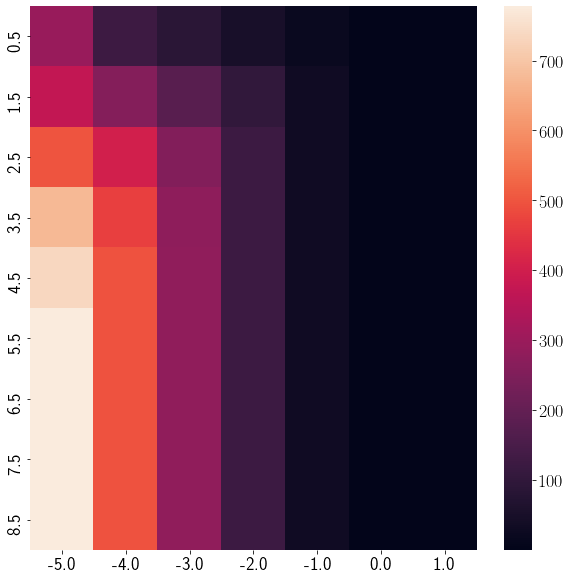

In [27]:
field_energies=dict([])
for k in ks:
    field_energies_k = dict([(a,sort_csv(os.path.join(paths[k][a], "field_energy.csv"), dtype=complex)) for a in paths[k]])
    field_energies[k]= field_energies_k
    #dict to dataframe
#each dataframe in this dictdict is about a grid (alpha,c) of simulaitons on one surface shape (k,a)
sb.heatmap(field_energies[6][6])

In [1]:
#varying H0
def min_as(alpha, c):
    a_s = range(0,10)
    minimum_as = dict([])
    minimum_Es = dict([])
    g_ratio=0
    H0s=np.arange(-8,9, .1)
    for H0 in H0s:
        minima_as_row = dict([])
        minima_Es_row = dict([])
        for k in ks:
            cy=cylinder.Cylinder(wavenumber=k/10, radius=1, kappa=1, gamma=g_ratio, intrinsic_curvature=H0)
            curvenergya={}
            for a in a_s:
                energy=cy.calc_surface_energy(amplitude=a/10) #this is (g*Area + kappa/2 Bending) already
                energy += 1*field_energies[k][a].loc[c, alpha]
                curvenergya[round(a,2)]=energy*k
            total_energy_vs_a = pd.Series(curvenergya)#turn dict to series
            min_a = total_energy_vs_a.idxmin()
            min_energy = total_energy_vs_a[min_a]
            minima_as_row[round(k,5)]=abs(min_a)
            minima_Es_row[round(k,5)]= min_energy
        minimum_as[round(H0,5)]=minima_as_row
        minimum_Es[round(H0,5)] = minima_Es_row
    minimum_as = pd.DataFrame(minimum_as)
    minimum_Es = pd.DataFrame(minimum_Es)
    sb.heatmap(minimum_as, cmap='bone')
    plt.gca().invert_yaxis()
min_as(alpha=-4, c=1.5)

NameError: name 'np' is not defined

# Recursive stability

Now for each cell with intermediate numerical $a_{min}$ value, I take a half-wavelength subsystem.  

$H_0 \rightarrow H_0'=H_0r'$

$r_0 \rightarrow r'_0= r_{max}=\frac{r_0(1-a \cos \tilde{d})} {\sqrt{1-a^2/2}}$ or

$r_0 \rightarrow r'_0= r_{min}=\frac{r_0(1-a )} {\sqrt{1-a^2/2}}$ or

mixed

$\kappa \rightarrow \kappa' = \kappa / r_0'^2 $

$k \rightarrow k'$ now in units of $r_0'$

check if unstable for any $\tilde{d} \in (0, \pi/2)$

get a critical wavenumber for the substystem 

$k'_c (H_0, \kappa')= \frac{1}{2} \sqrt{1-2\gamma/\kappa'-4h r' + \sqrt{8(2\gamma/\kappa'-3)+(-1+4h r' +2\gamma/\kappa')^2}}$

$k'_c (H_0, r_0')= \frac{1}{2} \sqrt{1-2 g r'^2 -4h r' + \sqrt{8(2 g r'^2-3)+(-1+4h r' +2 g r'^2)^2}}$

$k'_c (H_0, r_0')= \frac{1}{2r'} \sqrt{1-2 g -4h r' + \sqrt{8(2 g -3)+(-1+4h r' +2 g )^2}}$

In [225]:
def subsystem_kc(g, h, subr):
    ans=kcrit(g,h)
    h*=subr
    g*=subr**2
    g+=1/2*h**2
    #discriminant1_alt =-23 -16*h+ 12* g+64*h**2+ + 32 * g*h+4 * g**2
    discriminant1 =8*(2*g-3)+(-1+4*h+2*g)**2
    #print(discriminant1,discriminant1_alt )
    if discriminant1<0:
        return np.nan
    else:
        discriminant2 = 1-2*g-4*h + math.sqrt(discriminant1)
        #print(discriminant2, math.sqrt(discriminant1), 1-8*h + math.sqrt(discriminant1), 2*g)
        if discriminant2 <0:
            return np.nan
        else:
            if subr==1:
                assert( ans == 1/subr*.5*math.sqrt(discriminant2))
            return 1/subr*.5*math.sqrt(discriminant2)

In [226]:
def min_subr(a,d):
    #assuming r_0=1
    return (1-a)/math.sqrt(1+a**2/2)

def max_subr(a,d):
    #assuming r_0=1
    return (1-a*math.cos(d))/math.sqrt(1+a**2/2)

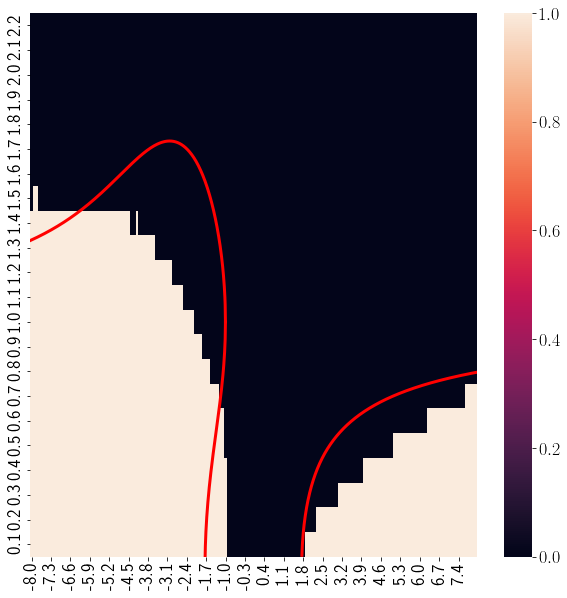

In [256]:
#max
r_estimate1 = max_subr
r_estimate2 = max_subr

dlim=math.pi/2

H0_s=df_minima_total_as[0].columns
subks={}
subks_bools={}
stable={}
for H0 in H0_s:
    subks[H0]={}
    subks_bools[H0]={}
    for k in df_minima_total_as[0].index:
        col_a_min = df_minima_total_as[0].loc[k, H0]
        colsub_k = subsystem_kc(g_ratio,float(H0),r_estimate1(col_a_min, dlim))
        subks[H0][k]=colsub_k
        subks_bools[H0][k]=any([colsub_k * d >= float(k) * math.pi * r_estimate2(col_a_min, d) 
                                for d in np.arange(0,dlim, .05)])
    
sub_ks=pd.DataFrame(subks)
sub_ks
sub_ks_bools=pd.DataFrame(subks_bools)
sub_ks_bools

sb.heatmap(sub_ks_bools)
plt.plot(fine_hs_scaled, kcrits_rangehs_scaled[0], color='red',linewidth=3)
plt.plot(fine_hs_scaled, kcrits_rangehs_second_scaled[0], color='red',linewidth=3)
plt.gca().invert_yaxis()

Linearly unstable subsystems exist where indicated.  Many things indicated recursivle stable here.
The shorter-wavelength (i.e. more relevant) ones indicates as ... not necessarily unstable in the curved state.  A sub-undulation will develop.  No info on whether this will destabilize.

But, these are likely unstable except a few near the $H_0=-.5$ edge, as they start out in shapes a=.8 or .9 anyway.

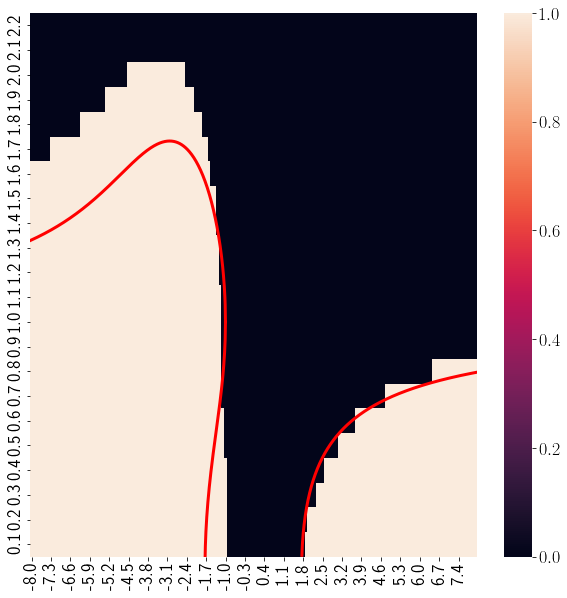

In [261]:
#mixed: the most conservative choice, that marks nearly everything as recursively unstable
r_estimate1 = max_subr
r_estimate2 = min_subr
dlim=math.pi/2

H0_s=df_minima_total_as[0].columns
subks={}
subks_bools={}
stable={}
for H0 in H0_s:
    subks[H0]={}
    subks_bools[H0]={}
    for k in df_minima_total_as[0].index:
        col_a_min = df_minima_total_as[0].loc[k, H0]
        colsub_k = subsystem_kc(g_ratio,float(H0),r_estimate1(col_a_min, dlim))
        subks[H0][k]=colsub_k
        subks_bools[H0][k]=any([colsub_k * d >= float(k) * math.pi * r_estimate2(col_a_min, d) 
                                for d in np.arange(0,dlim, .05)])
    
sub_ks=pd.DataFrame(subks)
sub_ks
sub_ks_bools=pd.DataFrame(subks_bools)
sub_ks_bools

sb.heatmap(sub_ks_bools)
plt.plot(fine_hs_scaled, kcrits_rangehs_scaled[0], color='red',linewidth=3)
plt.plot(fine_hs_scaled, kcrits_rangehs_second_scaled[0], color='red',linewidth=3)
plt.gca().invert_yaxis()

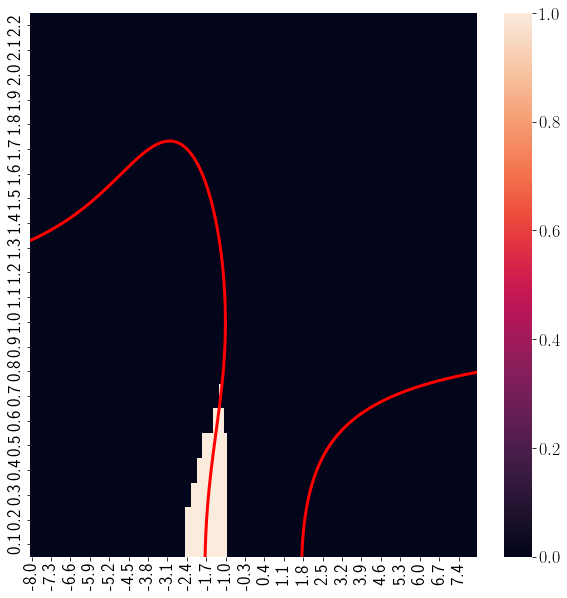

In [262]:
#min
r_estimate1 = min_subr
r_estimate2 = min_subr
dlim=math.pi/2

H0_s=df_minima_total_as[0].columns
subks={}
subks_bools={}
stable={}
for H0 in H0_s:
    subks[H0]={}
    subks_bools[H0]={}
    for k in df_minima_total_as[0].index:
        col_a_min = df_minima_total_as[0].loc[k, H0]
        colsub_k = subsystem_kc(g_ratio,float(H0),r_estimate1(col_a_min, dlim))
        subks[H0][k]=colsub_k
        subks_bools[H0][k]=any([colsub_k * d >= float(k) * math.pi * r_estimate2(col_a_min, d) 
                                for d in np.arange(0,dlim, .05)])
        subks_bools[H0][k]= colsub_k * dlim >= float(k) * math.pi * r_estimate2(col_a_min, d)
    
sub_ks=pd.DataFrame(subks)
sub_ks
sub_ks_bools=pd.DataFrame(subks_bools)
sub_ks_bools

sb.heatmap(sub_ks_bools)
plt.plot(fine_hs_scaled, kcrits_rangehs_scaled[0], color='red',linewidth=3)
plt.plot(fine_hs_scaled, kcrits_rangehs_second_scaled[0], color='red',linewidth=3)
plt.gca().invert_yaxis()

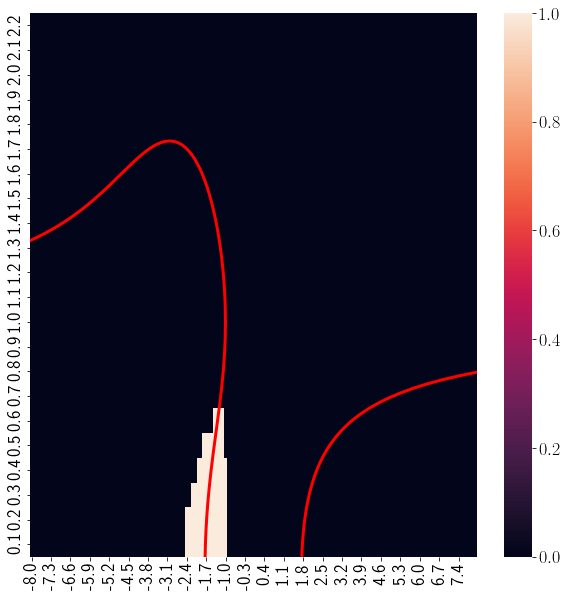

In [263]:
#least conservative estimate
r_estimate1 = min_subr
r_estimate2 = max_subr
dlim=math.pi/2

H0_s=df_minima_total_as[0].columns
subks={}
subks_bools={}
stable={}
for H0 in H0_s:
    subks[H0]={}
    subks_bools[H0]={}
    for k in df_minima_total_as[0].index:
        col_a_min = df_minima_total_as[0].loc[k, H0]
        colsub_k = subsystem_kc(g_ratio,float(H0),r_estimate1(col_a_min, dlim))
        subks[H0][k]=colsub_k
        subks_bools[H0][k]=any([colsub_k * d >= float(k) * math.pi * r_estimate2(col_a_min, d) 
                                for d in np.arange(0,dlim, .05)])
    
sub_ks=pd.DataFrame(subks)
sub_ks
sub_ks_bools=pd.DataFrame(subks_bools)
sub_ks_bools

sb.heatmap(sub_ks_bools)
plt.plot(fine_hs_scaled, kcrits_rangehs_scaled[0], color='red',linewidth=3)
plt.plot(fine_hs_scaled, kcrits_rangehs_second_scaled[0], color='red',linewidth=3)
plt.gca().invert_yaxis()